In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import geopandas as gpd
import matplotlib.ticker as mticker
import requests
import zipfile
import io

matplotlib.use('Qt5Agg')

C:\Users\Adda\AppData\Local\Temp\ipykernel_6912\3914812127.py:12: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed two minor releases later.  To suppress this warning, explicitly call plt.close('all') first.
  matplotlib.use('Qt5Agg')


In [21]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = 'Resources/data_interpolated.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,Date,CityName,StateName,MedianSalePrice,Year,MedianListPrice,SalesTotal,Total Population,Median Income,MORTGAGE30US,Unemployment Rate,HAI
0,2008-02-29,United States,NaN,174000.0,2008.0,NaN,205206.0,NaN,NaN,NaN,NaN,NaN
1,2008-02-29,New York,NY,400000.0,2008.0,NaN,8591.0,NaN,NaN,NaN,NaN,NaN
2,2008-02-29,Los Angeles,CA,470000.0,2008.0,NaN,4159.0,NaN,NaN,NaN,NaN,NaN
3,2008-02-29,Chicago,IL,224000.0,2008.0,NaN,5933.0,NaN,NaN,NaN,NaN,NaN
4,2008-02-29,Dallas,TX,138000.0,2008.0,NaN,5058.0,NaN,NaN,NaN,NaN,NaN


In [22]:
def plot_with_secondary_axis(data, y_variable):
    # Apply the default theme
    sns.set_theme()
    
    # Filtering data specifically for the United States and aggregating by year, correcting 'Year' data type
    # Filter the data for the desired years and exclude rows where 'CityName' is "United States"
    filtered_data = data[(data['Year'] >= 2009) & (data['Year'] <= 2022) & (data['CityName'] != 'United States')]

    # Group the filtered data by 'Year' and calculate the mean of 'SalesTotal' and the specified y_variable
    us_data = filtered_data.groupby('Year').agg({'SalesTotal':'sum', y_variable:'mean'}).reset_index()
    us_data['Year'] = us_data['Year'].astype(int)  # Convert 'Year' to integer

    # Ensure 'SalesTotal' and 'Median Income' are numeric
    us_data['SalesTotal'] = pd.to_numeric(us_data['SalesTotal'], errors='coerce')
    us_data[y_variable] = pd.to_numeric(us_data[y_variable], errors='coerce')

    # Drop rows with non-numeric values in 'Median Income'
    us_data = us_data.dropna(subset=[y_variable])

    # Building sns barplot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=us_data, x=us_data.index, y='SalesTotal', saturation=0.75, fill=True)

    # Create a secondary y-axis
    ax2 = plt.gca().twinx()

    # Your Seaborn line plot
    sns.lineplot(x='Year', y=y_variable, data=us_data, ax=ax2)

    # Set labels and title
    plt.xlabel('Year')
    plt.ylabel('Total Home Sales in US')
    ax2.set_ylabel(y_variable)
    plt.title(f'Total Home Sales and {y_variable} in the US Over Years')

    # Show the plot
    plt.show()

# Example usage:
# Assuming your DataFrame is named 'data'
plot_with_secondary_axis(data, 'Median Income')
# Help!

c:\Users\Adda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

: 

In [3]:
def plot_with_secondary_axis(data, y_variable):
    # Apply the default theme
    sns.set_theme()
    
    # Filtering data specifically for the United States and aggregating by year, correcting 'Year' data type
    #data['Year'] = data['Year'].astype(str).str.split('.').str[0]
    # us_data = data[data['CityName'] == 'United States'].groupby('Year').agg({'SalesTotal':'sum', y_variable:'mean'}).dropna()
    us_data = data[data['CityName'] == 'United States'].groupby('Year').agg({'SalesTotal':'sum', y_variable:'mean'}).dropna().reset_index()
    us_data['Year'] = us_data['Year'].astype(int)  # Convert 'Year' to integer
    us_data['Median Income'] = us_data['Median Income'].astype(int)  # Convert 'Year' to integer

    # Building sns barplot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=us_data, x=us_data.index, y=us_data['SalesTotal'], saturation=0.75, fill=True)

    # Create a secondary y-axis
    ax2 = plt.gca().twinx()

    # Your Seaborn line plot
    sns.lineplot(x=us_data.index, y=us_data[y_variable], data=us_data, ax=ax2)

    # Set labels and title
    plt.xlabel('Year')
    plt.ylabel('Total Home Sales in US')
    ax2.set_ylabel(y_variable)
    plt.title(f'Total Home Sales and {y_variable} in the US Over Years')

    # Show the plot
    plt.show()

# Example usage:
# Assuming your DataFrame is named 'data'
plot_with_secondary_axis(data, 'Median Income')

c:\Users\Adda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1200x800 with 0 Axes>

c:\Users\Adda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Adda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

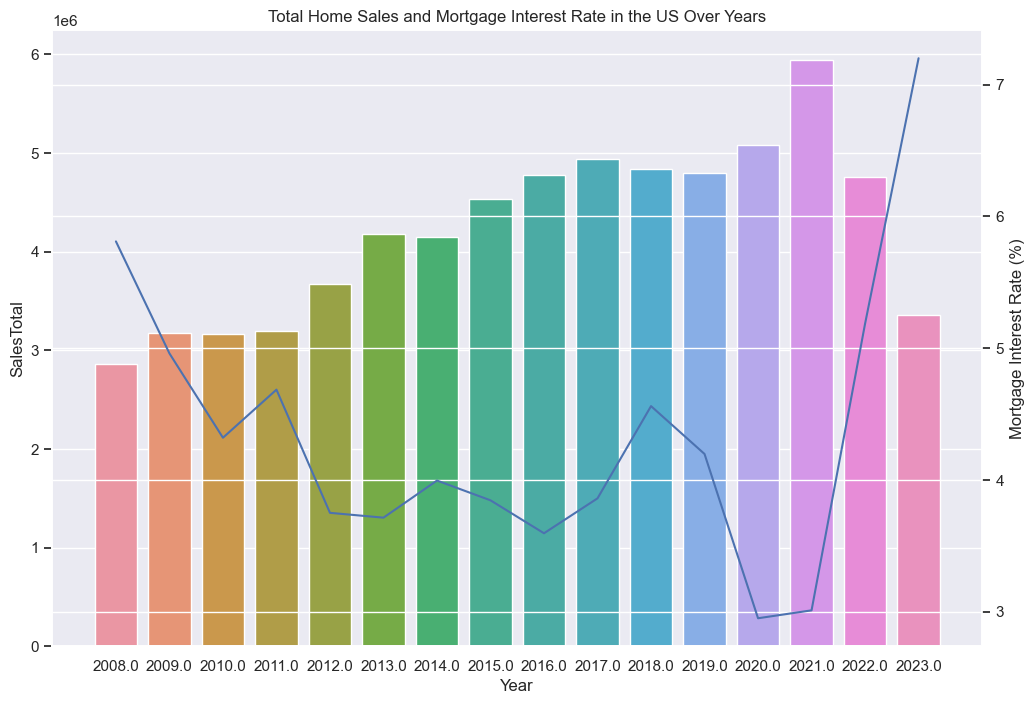

In [19]:
# Apply the default theme
sns.set_theme()

# Filtering data specifically for the United States and aggregating by year
data['Year'] = data['Year'].astype(str)
us_data = data[data['CityName'] == 'United States'].groupby('Year').agg({'SalesTotal':'sum', 'MORTGAGE30US':'mean'}).dropna()

# Building sns barplot
plt.figure(figsize=(12, 8))
sns.barplot(data=us_data, x=us_data.index, y=us_data['SalesTotal'], saturation=0.75, fill=True)

# Create a secondary y-axis
ax2 = plt.gca().twinx()

# Your Seaborn line plot
sns.lineplot(x=us_data.index, y=us_data['MORTGAGE30US'], data=us_data, ax=ax2)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Total Home Sales in US')
ax2.set_ylabel('Mortgage Interest Rate (%)')
plt.title('Total Home Sales and Mortgage Interest Rate in the US Over Years')

# Show the plot
plt.show()

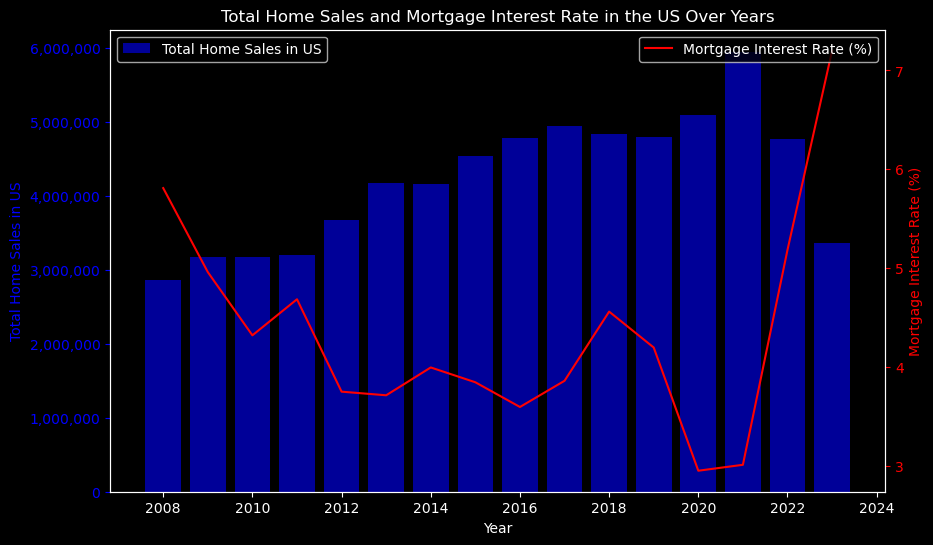

In [12]:
# Apply the default theme
sns.set_theme()

# Filtering data specifically for the United States and aggregating by year
us_data = data[data['CityName'] == 'United States'].groupby('Year').agg({'SalesTotal':'sum', 'MORTGAGE30US':'mean'}).dropna()

# Creating the combined graph for US data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar graph for home sales in the US
ax1.bar(us_data.index, us_data['SalesTotal'], color='b', alpha=0.6, label='Total Home Sales in US')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Home Sales in US', color='b')
ax1.tick_params('y', colors='b')

# Format the y-axis to avoid exponential notation
ax1.get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Line graph for mortgage interest rate in the US
ax2 = ax1.twinx()
ax2.plot(us_data.index, us_data['MORTGAGE30US'], color='r', label='Mortgage Interest Rate (%)')
ax2.set_ylabel('Mortgage Interest Rate (%)', color='r')
ax2.tick_params('y', colors='r')

# Title and legend
plt.title('Total Home Sales and Mortgage Interest Rate in the US Over Years')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.savefig('png/Total Home Sales and Mortgage Interest Rate in the US Over Years.png', dpi = 300)
plt.show()

In [ ]:
sns.barplot(x='Category', y='Value', data=df)
plt.title('Bar Chart Example')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()